In [1]:
import numpy as np
import runstats
import gym
import ptitprince as pt
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from BAC import TabularBAC

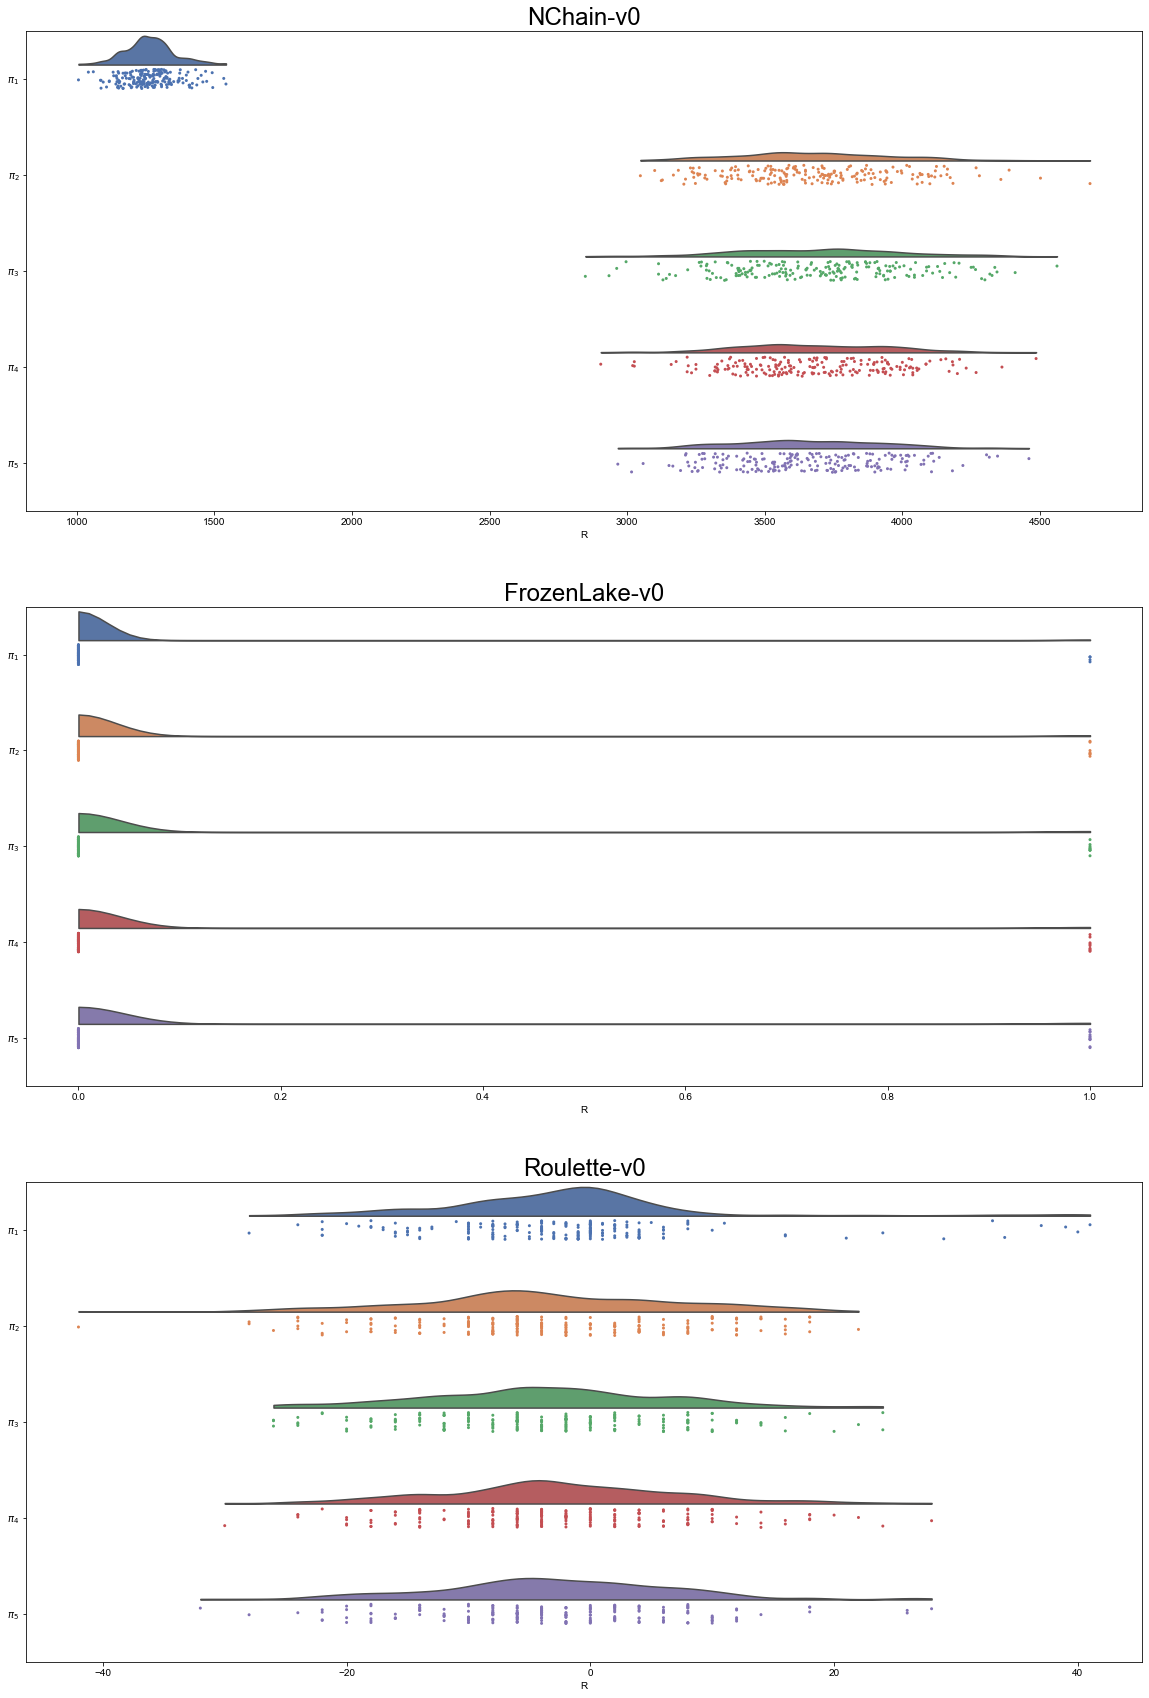

In [2]:
env_list = ['NChain-v0', 'FrozenLake-v0', 'Roulette-v0']

gamma = 0.99
alpha = 0.1
num_samples = 100
num_iterations = 1000
max_episodes = 1000
num_updates = 5

returns = np.zeros((len(env_list), max_episodes // num_updates, num_updates))

for i in range(len(env_list)):
    env = gym.make(env_list[i])
    num_states = env.observation_space.n
    num_actions = env.action_space.n
    BAC = TabularBAC(num_states, num_actions, gamma, alpha, num_samples, num_iterations)
    s = env.reset()
    episodic_reward = 0
    for t in range(max_episodes):
        if t % (max_episodes // num_updates) == 0:
            BAC.update_policy()
        while True:
            a = BAC.get_action(s)
            s_, r, done, _ = env.step(a)
            BAC.update(s, a, r, s_, done)
            episodic_reward += r
            if done:
                s = env.reset()
                returns[i, t % (max_episodes // num_updates), t // (max_episodes // num_updates)] = episodic_reward
                episodic_reward = 0
                break
            else:
                s = s_
         
f, ax = plt.subplots(len(env_list), 1, figsize=(20,len(env_list)*10))
for i in range(len(env_list)):
    df = pd.DataFrame(returns[i,:, :], columns=[r'$\pi_1$', r'$\pi_2$', r'$\pi_3$', r'$\pi_4$', r'$\pi_5$'])
    sns.set(style="whitegrid", font_scale=2)
    ort = "h";
    pal = sns.color_palette(n_colors=5)
    ax[i] = pt.half_violinplot(data=df, palette=pal, bw=.2, cut=0.,
                            scale="area", width=.6, inner=None, orient=ort, ax=ax[i])
    ax[i] = sns.stripplot(data=df, palette=pal, edgecolor="white",
                       size=3, jitter=1, zorder=0, orient=ort, ax=ax[i])
    ax[i].set_xlabel("R")
    ax[i].set_title(env_list[i])
plt.show()